### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# My GitHub Repository 
https://github.com/ajoshi91/Joshi_Anand_DA301_Assignment

# *Linear regression using Python

## 1. Load and explore the data

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [5]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [6]:
# Print the data types of each column
print(reviews.dtypes)

# Print metadata of the dataframe
print(reviews.info())

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform               

In [7]:
# Check for missing values in the dataframe
missing_values = reviews.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [8]:
# Generate summary statistics
summary_stats = reviews.describe()

# Print the summary statistics
print(summary_stats)

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


## 2. Drop columns

In [9]:
# Remove redundant columns
reviews = reviews.drop(["language", "platform"], axis=1)

# View the column names
column_names = reviews.columns
print(column_names)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [31]:
# Rename the column headings
reviews = reviews.rename(columns={"remuneration (k£)": "Income (k£)", "spending_score (1-100)": "sp_score"})

# View the modified column names
modified_columns = reviews.columns
print(modified_columns)

Index(['gender', 'age', 'Income (k£)', 'sp_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [32]:
# Save clean DataFrame as CSV file.
reviews.to_csv('clean_reviews.csv', index=False)

# Import the CSV file for sense-check.
clean_reviews = pd.read_csv('clean_reviews.csv')

# View DataFrame.
clean_reviews

,gender,age,Income (k£),sp_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [35]:
# Check the shape of the imported DataFrame.
print(clean_reviews.shape)

# Print the metadata of the imported DataFrame.
print(clean_reviews.info())

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   Income (k£)     2000 non-null   float64
 3   sp_score        2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


## 5. Linear regression

### 5a) age vs loyalty

In [36]:
# Independent variable.
X = clean_reviews['age']

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model.
# Add constant term to the independent variable.
X = sm.add_constant(X)

# Create the OLS model.
model = sm.OLS(y, X)

In [37]:
# Fit the model.
results = model.fit()

# Extract estimated parameters, standard errors, and predicted values.
params = results.params
std_errors = results.bse
predicted_values = results.fittedvalues

In [38]:
# Print the regression table
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 07 Jul 2023   Prob (F-statistic):             0.0577
Time:                        23:26:06   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

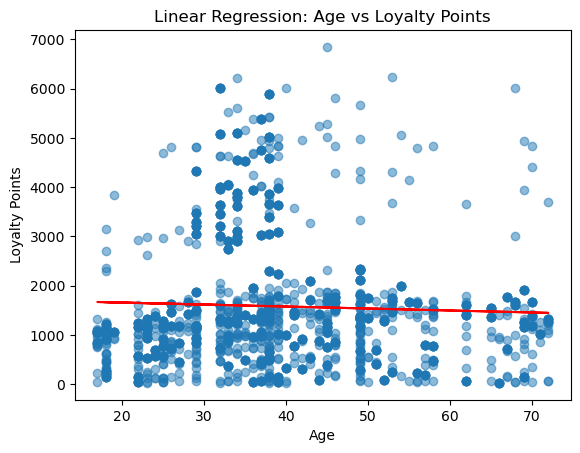

In [39]:
# Scatter plot of 'age' vs 'loyalty_points'
plt.scatter(clean_reviews['age'], clean_reviews['loyalty_points'], alpha=0.5)

# Add regression line.
plt.plot(clean_reviews['age'], predicted_values, color='red')

# Set labels and title.
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Linear Regression: Age vs Loyalty Points')

# Display the plot.
plt.show() 

### 5b) income vs loyalty

In [40]:
# Independent variable.
X = clean_reviews['Income (k£)']

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model.
# Add constant term to the independent variable.
X = sm.add_constant(X)

# Create the OLS model.
model = sm.OLS(y, X)

In [42]:
# Fit the model
results = model.fit()

# Extract estimated parameters, standard errors, and predicted values
params = results.params
std_errors = results.bse
predicted_values = results.fittedvalues

In [43]:
# Print the regression table
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        00:37:26   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -65.6865     52.171     -1.259      

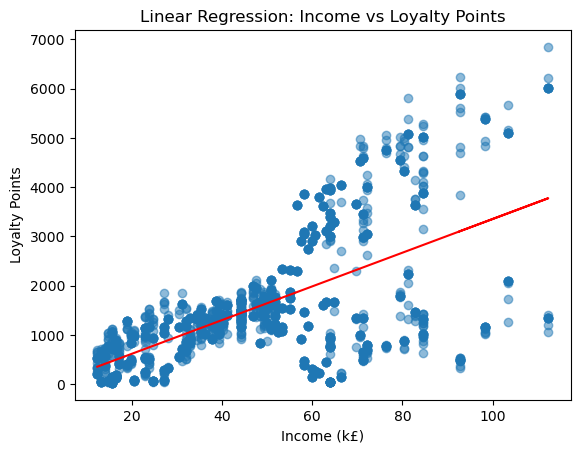

In [44]:
# Plot graph with regression line.
# Scatter plot of 'Income (k£)' vs 'loyalty_points'
plt.scatter(clean_reviews['Income (k£)'], clean_reviews['loyalty_points'], alpha=0.5)

# Add regression line
plt.plot(clean_reviews['Income (k£)'], predicted_values, color='red')

# Set labels and title
plt.xlabel('Income (k£)')
plt.ylabel('Loyalty Points')
plt.title('Linear Regression: Income vs Loyalty Points')

# Display the plot
plt.show() 

### 5c) spending vs loyalty

In [45]:
# Independent variable.
X = clean_reviews['sp_score']

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model.
# Add constant term to the independent variable
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X) 

In [46]:
# Fit the model
results = model.fit()

# Extract estimated parameters, standard errors, and predicted values
params = results.params
std_errors = results.bse
predicted_values = results.fittedvalues 

In [47]:
# Print the regression table
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        22:29:52   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.0527     45.931     -1.634      0.1

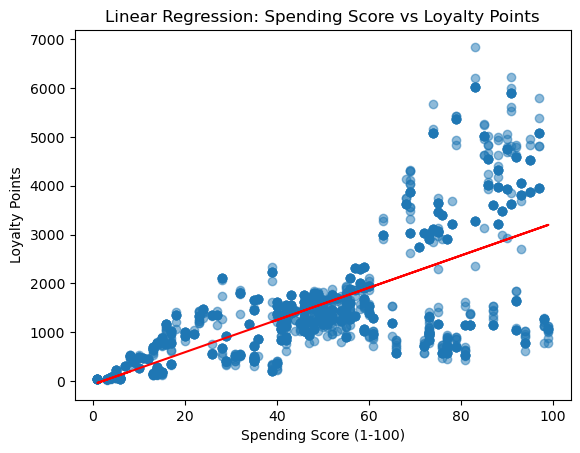

In [48]:
# Plot graph with regression line.
# Scatter plot of 'spending score' vs 'loyalty_points'
plt.scatter(clean_reviews['sp_score'], clean_reviews['loyalty_points'], alpha=0.5)

# Add regression line
plt.plot(clean_reviews['sp_score'], predicted_values, color='red')

# Set labels and title
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Loyalty Points')
plt.title('Linear Regression: Spending Score vs Loyalty Points')

# Display the plot
plt.show() 

## 6. Observations and insights

Overall, the results suggest that 'age' has limited predictive power for 'loyalty points' in the linear regression model. The coefficient for 'age' is negative, indicating a potential negative relationship, but it is not statistically significant at the conventional significance level.

In additon to this, the results suggest that 'Income' is a significant predictor of 'loyalty points' in the linear regression model. The positive coefficient indicates a positive relationship between 'Income' and 'loyalty points', with higher income levels being associated with higher loyalty points.

Finally, the results suggest that 'spending score' is a significant predictor of 'loyalty points' in the linear regression model. The positive coefficient indicates a positive relationship between 'spending score' and 'loyalty points', with higher spending scores being associated with higher loyalty points. 

# 

# *Clustering with *k*-means using Python


## 1. Load and explore the data

In [2]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore') 

In [3]:
# Import the CSV file.
clean_reviews = pd.read_csv('clean_reviews.csv')

# Create the new DataFrame df2 with 'Income' and 'Spending score' columns
df2 = clean_reviews[['Income (k£)', 'sp_score']] 

# View DataFrame.
df2 

,Income (k£),sp_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [4]:
# Explore the data.
# Print the data types of each column
print(df2.dtypes)

# Print metadata of the dataframe
print(df2.info()) 

Income (k£)    float64
sp_score         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Income (k£)  2000 non-null   float64
 1   sp_score     2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


In [5]:
# Generate summary statistics
summary_stats_df2 = df2.describe()

# Print the summary statistics
print(summary_stats_df2) 

       Income (k£)     sp_score
count  2000.000000  2000.000000
mean     48.079060    50.000000
std      23.123984    26.094702
min      12.300000     1.000000
25%      30.340000    32.000000
50%      47.150000    50.000000
75%      63.960000    73.000000
max     112.340000    99.000000


## 2. Plot

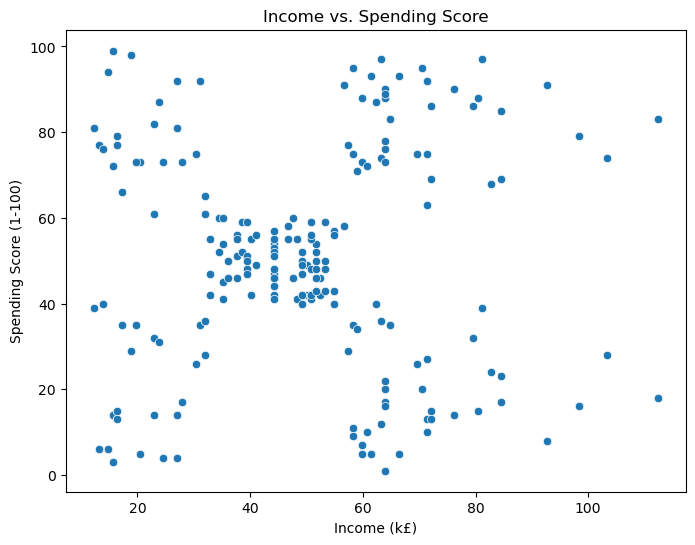

In [6]:
# Scatter plot of Income versus Spending score.

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the scatter plot
sns.scatterplot(data=df2, x='Income (k£)', y='sp_score')

# Set the title
plt.title('Income vs. Spending Score')

# Set the x-axis label
plt.xlabel('Income (k£)')

# Set the y-axis label
plt.ylabel('Spending Score (1-100)')

# Display the scatter plot
plt.show() 

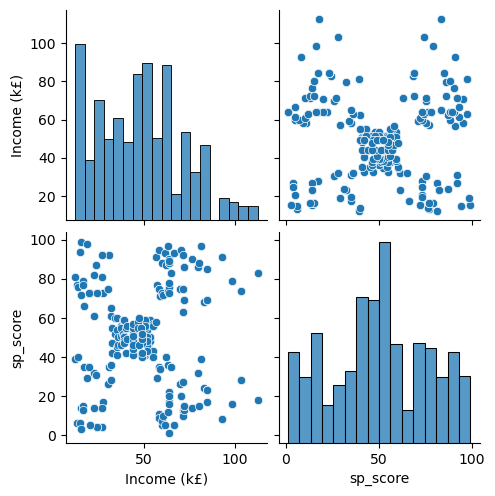

In [7]:
# Pair plot for remuneration and spending score.

# Create the pair plot
sns.pairplot(df2)

# Display the pair plot
plt.show() 

## 3. Elbow and silhoutte methods

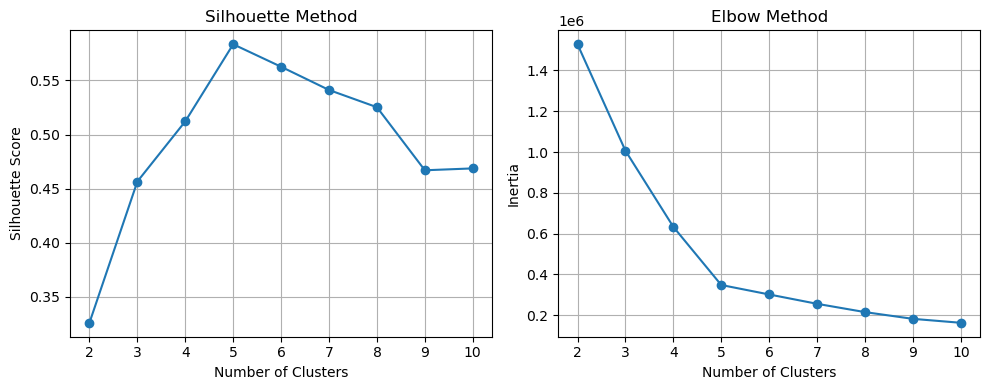

In [13]:
# Determine the number of clusters: Elbow method & Silhouette method.
# Prepare the data
X = df2.values

# Initialise lists to store the results
silhouette_scores = []
inertia_values = []

# Define the range of clusters to try
cluster_range = range(2, 11)

# Perform k-means clustering and calculate silhouette scores and inertia values
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

# Plot the Silhouette scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.grid(True) 

# Plot the Elbow curve (Inertia values)
plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

plt.tight_layout()
plt.show()   

## 4. Evaluate k-means model at different values of *k*

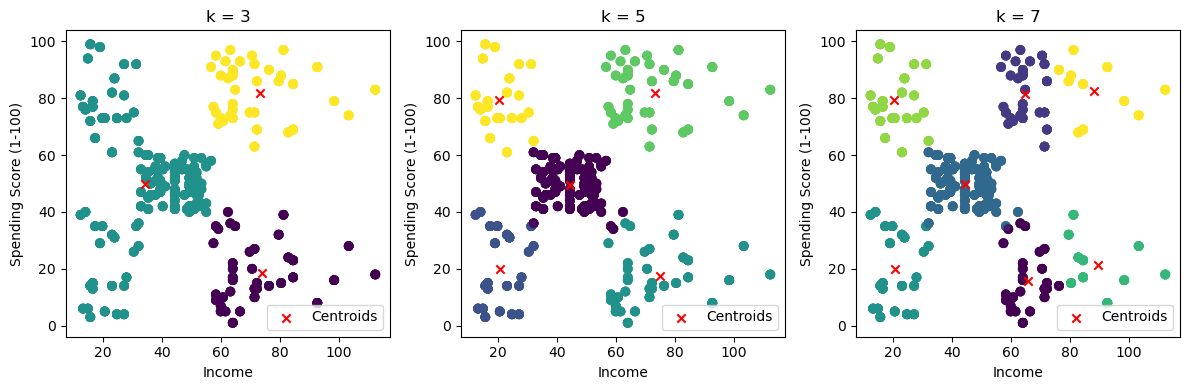

In [11]:
# Choose at least three values of k for evaluation
k_values = [3, 5, 7]

# Plot the predicted k-means for each value of k
plt.figure(figsize=(12, 4))
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    
    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
    plt.xlabel('Income')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f'k = {k}')
    plt.legend()

plt.tight_layout()
plt.show() 

## 5. Fit final model and justify your choice

In [17]:
# Apply the final model.
final_kmeans = KMeans(n_clusters=5, random_state=0)
final_kmeans.fit(X)

# Get the cluster labels for each data point
final_labels = final_kmeans.labels_ 

# Comment on the cluster sizes
cluster_sizes = np.bincount(final_labels)
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i}: {size} observations") 

Cluster 0: 774 observations
Cluster 1: 271 observations
Cluster 2: 330 observations
Cluster 3: 356 observations
Cluster 4: 269 observations


In [15]:
# Count the number of observations per predicted class
predicted_class_counts = pd.Series(final_labels).value_counts()
print(predicted_class_counts)

0    774
3    356
2    330
1    271
4    269
dtype: int64


Cluster 0: This cluster, with the largest number of observations, could represent a segment of customers who have moderate income and spending scores. They might exhibit average purchasing power and engagement levels.

Cluster 1: This cluster, with relatively fewer observations, may represent a segment of customers with low income and low spending scores. These customers might have limited purchasing power and lower engagement or spending levels.

Cluster 2: This cluster, with a moderate number of observations, could consist of customers with moderate to high incomes but relatively lower spending scores. These customers may have the financial capacity to spend more but exhibit specific spending behavior or preferences. 

Cluster 3: This cluster, with a relatively large number of observations, could represent a segment of customers with diverse characteristics. Further analysis of the variables and patterns within this cluster may be necessary to provide a more specific interpretation.

Cluster 4: This cluster, with a smaller number of observations, may represent a segment of customers with distinct characteristics. Analysing the variables and behavior patterns specific to this cluster can provide deeper insights into the underlying customer segment. 

## 6. Plot and interpret the clusters

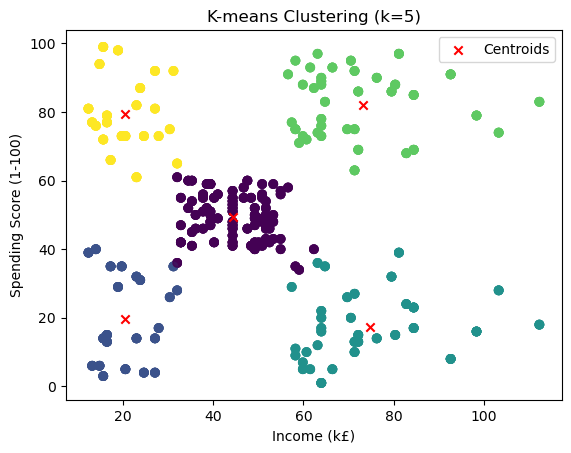

In [20]:
# Visualising the clusters.
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='viridis', alpha=0.5)
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Income (k£)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering (k=5)')
plt.legend()
plt.show() 

## 7. Discuss: Insights and observations


The value of 5 has the highest silhouette score and also corresponds to the elbow point in the Elbow curve plot, it suggests that 5 clusters might provide the best clustering for the data. This alignment between the two methods strengthens the case for selecting 5 as the optimal value of k.

In addition, the high silhouette score indicates well-defined clusters, with data points within each cluster being more similar to each other than to data points in other clusters. This suggests good separation and distinctness among the clusters, indicating meaningful groupings in the data.

The elbow point in the Elbow curve plot suggests that adding more clusters beyond 5 may not provide substantial improvement in terms of minimising inertia. It indicates a diminishing return in reducing within-cluster sum of squares as more clusters are added. This implies that 5 clusters strike a balance between capturing the main patterns in the data and avoiding unnecessary complexity.

Furthermore, The cluster sizes indicate the number of data points assigned to each respective cluster. Cluster 0 has the largest size with 774 observations, followed by Cluster 3 with 356 observations. Clusters 1, 2, and 4 have relatively smaller sizes with 271, 330, and 269 observations, respectively.

The varying cluster sizes suggest that the data points are not evenly distributed among the clusters, indicating potential differences in the underlying patterns or behaviours represented by each cluster. So, analysing the cluster sizes can be valuable for further analysis and decision-making. 

# 

# *NLP using Python


## 1. Load and explore the data

In [23]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore') 

In [24]:
# Load the data set as df3.
# Import the CSV file.
clean_reviews = pd.read_csv('clean_reviews.csv')

# Keep necessary columns. Drop unnecessary columns
df3 = clean_reviews[['review', 'summary']] 

# View DataFrame.
df3 

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [25]:
# Explore data set.
# Print the data types of each column
print(df3.dtypes)

# Print metadata of the dataframe
print(df3.info()) 

review     object
summary    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [26]:
# Determine if there are any missing values.
missing_values_df3 = df3.isnull().sum()

# Print the count of missing values for each column
print(missing_values_df3) 

review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [27]:
# Convert the data to lowercase
df3['review'] = df3['review'].str.lower()
df3['summary'] = df3['summary'].str.lower() 

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [28]:
# Replace all the punctuations in review and summary columns.

# Replace punctuations in the 'review' column
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Replace punctuations in the 'summary' column
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9\n\nyour unpainted...
2    nice art nice printing  why two panels are fil...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

### 2c) Drop duplicates in both columns

In [29]:
# Drop duplicates in the 'review' column
df3['review'] = df3['review'].drop_duplicates()

# Drop duplicates in the 'summary' column
df3['summary'] = df3['summary'].drop_duplicates()

# View DataFrame.
df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,NaN
1997,great game for all\nkeeps the mind nimble,NaN
1998,NaN,NaN


## 3. Tokenise and create wordclouds

In [30]:
# Create a copy of the DataFrame
df3_copy = df3.copy()

# View DataFrame.
df3_copy 

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,NaN
1997,great game for all\nkeeps the mind nimble,NaN
1998,NaN,NaN


In [32]:
# Convert the 'review' column to string format
df3_copy['review'] = df3_copy['review'].astype(str)

# Convert the 'summary' column to string format
df3_copy['summary'] = df3_copy['summary'].astype(str)

# Tokenise the 'review' column
df3_copy['review_tokens'] = df3_copy['review'].apply(word_tokenize)

# Tokenise the 'summary' column
df3_copy['summary_tokens'] = df3_copy['summary'].apply(word_tokenize)

# View DataFrame.
df3_copy      

,review,summary,review_tokens,summary_tokens
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1996,great game did not think i would like it when...,nan,"[great, game, did, not, think, i, would, like,...",[nan]
1997,great game for all\nkeeps the mind nimble,nan,"[great, game, for, all, keeps, the, mind, nimble]",[nan]
1998,nan,nan,[nan],[nan]


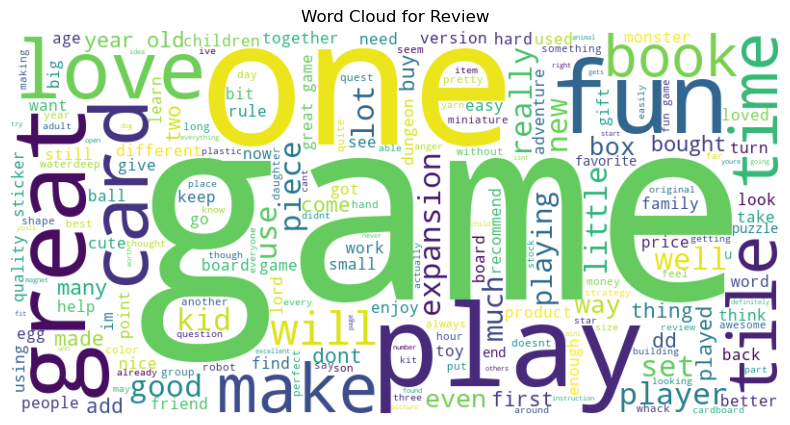

In [33]:
# Create a word cloud for the 'review' column
review_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df3_copy['review_tokens'].explode()))
plt.figure(figsize=(10, 5))
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review')
plt.show() 

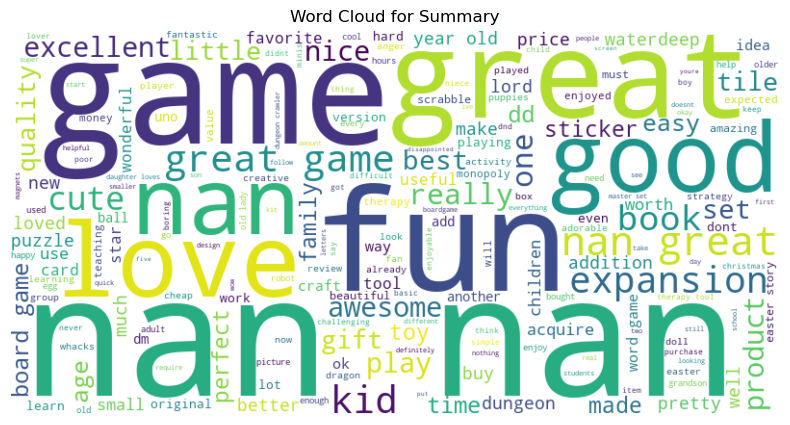

In [49]:
# Filter out NaN values from 'review' and 'summary' columns
df3_filtered = df3_copy[pd.notna(df3_copy['review']) & pd.notna(df3_copy['summary'])]

# Create a word cloud for the 'summary' column
summary_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df3_filtered['summary_tokens'].explode()))
plt.figure(figsize=(10, 5))
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Summary') 
plt.show() 

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [27]:
# Determine the frequency distribution.
# Combine all words from 'review' and 'summary' columns
all_words = df3_filtered['review'] + df3_filtered['summary']

# Calculate the frequency distribution
fdist = FreqDist(all_words)
print(fdist) 

<FreqDist with 1349 samples and 1349 outcomes>


### 4b) Remove alphanumeric characters and stopwords

In [28]:
# Remove alphanumeric characters
no_words_alpha = [word for word in all_words if isinstance(word, str) and not word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
words_no_stopwords = [word for word in no_words_alpha if word not in stop_words]  

### 4c) Create wordcloud without stopwords

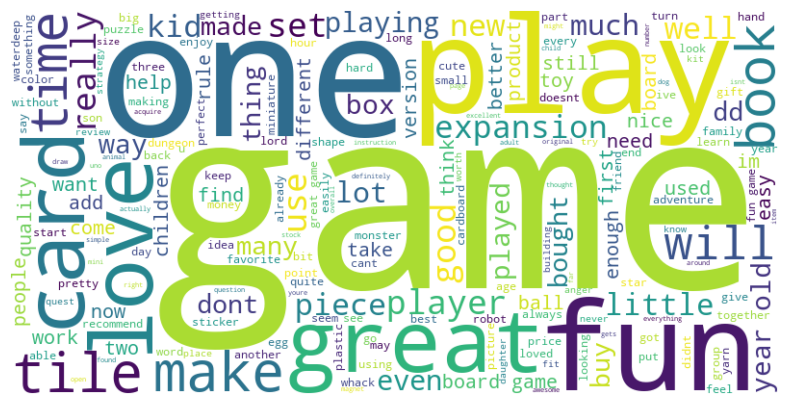

In [29]:
# Convert the list of words without stopwords back to a string
text = ' '.join(words_no_stopwords)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the wordcloud image.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Display the word cloud
plt.show() 

### 4d) Identify 15 most common words and polarity

In [30]:
# Determine the 15 most common words.
from nltk.sentiment import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyser object
sia = SentimentIntensityAnalyzer()

# Get the polarity scores for each word
word_polarity = {word: sia.polarity_scores(word)['compound'] for word in words_no_stopwords}

# Sort the words based on their frequency in descending order
sorted_words = sorted(word_polarity.items(), key=lambda x: fdist[x[0]], reverse=True)

# Get the top 15 most common words
top_15_words = sorted_words[:15]

# Print the top 15 words and their polarity
for word, polarity in top_15_words:
    print(f"{word}: Polarity Score = {polarity:.2f}") 

when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completelythe fact that 50 of this space is wasted on art and not terribly informative or needed art : Polarity Score = -0.66
an open letter to galeforce9

your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [26]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [34]:
# Calculate sentiment polarity for the 'review' column
df3_filtered['review_polarity'] = df3_filtered['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate sentiment polarity for the 'summary' column
df3_filtered['summary_polarity'] = df3_filtered['summary'].apply(lambda x: TextBlob(x).sentiment.polarity)

df3_filtered.head()

,review,summary,review_polarity,summary_polarity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,0.035952,-0.80
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,0.116640,0.00
3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00
4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.00


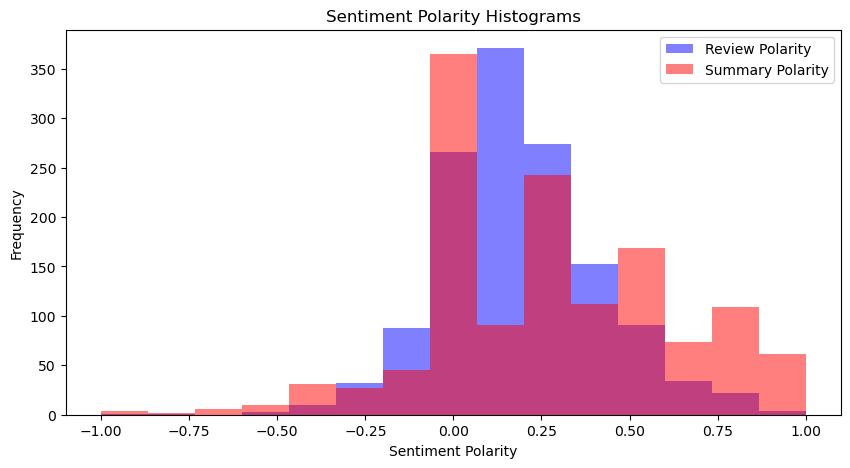

In [35]:
# Plot histograms of polarity scores (15 bins)
plt.figure(figsize=(10, 5))
plt.hist(df3_filtered['review_polarity'], bins=15, color='blue', alpha=0.5, label='Review Polarity')
plt.hist(df3_filtered['summary_polarity'], bins=15, color='red', alpha=0.5, label='Summary Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Polarity Histograms')
plt.legend()
plt.show() 

In [36]:
# Review sentiment scores for the respective columns
print("Review Polarity Scores:")
print(df3_filtered['review_polarity'].describe())

print("\nSummary Polarity Scores:")
print(df3_filtered['summary_polarity'].describe()) 

Review Polarity Scores:
count    1349.000000
mean        0.181170
std         0.225455
min        -1.000000
25%         0.040476
50%         0.153571
75%         0.308889
max         1.000000
Name: review_polarity, dtype: float64

Summary Polarity Scores:
count    1349.000000
mean        0.271704
std         0.349649
min        -1.000000
25%         0.000000
50%         0.250000
75%         0.500000
max         1.000000
Name: summary_polarity, dtype: float64


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [37]:
# Identify the top 20 positive reviews
top_positive_reviews = df3_filtered.nlargest(20, 'review_polarity')
print("Top 20 Positive Reviews:")
print(top_positive_reviews['review'])

# Identify the top 20 positive summaries
top_positive_summaries = df3_filtered.nlargest(20, 'summary_polarity')
print("\nTop 20 Positive Summaries:")
print(top_positive_summaries['summary'])

# Identify the top 20 negative reviews
top_negative_reviews = df3_filtered.nsmallest(20, 'review_polarity')
print("\nTop 20 Negative Reviews:")
print(top_negative_reviews['review'])

# Identify the top 20 negative summaries
top_negative_summaries = df3_filtered.nsmallest(20, 'summary_polarity')
print("\nTop 20 Negative Summaries:")
print(top_negative_summaries['summary'])  

Top 20 Positive Reviews:
790                                               perfect
1550    my daughter loves her stickers awesome seller ...
1967         perfect for tutoring my grandson in spelling
1245    the best part i see is the box  what a wonderf...
703     great quality  very cute and perfect for my to...
36      the pictures are great  ive done one and gave ...
474         great seller happy with my purchase 5 starrrr
620                            great easter gift for kids
685                                       these are great
961     bought this because i wanted it all these dd g...
1140                          husband seems happy with it
1147          great accessory to use with the playing mat
1150    great price arrived on time with no damage wil...
1249    this is a great accessory to the starter set  ...
1536    my granddaughter loves these  so happy to find...
1602    great doll to go with the book  animals cant w...
1705        a great creation tool it helps me c

## 7. Discuss: Insights and observations

***Your observations here...***

In summary, the statistics suggest that the majority of the reviews and summaries exhibit positive sentiment, as indicated by the positive mean values. However, the presence of negative polarity scores and the moderate standard deviation indicate a diversity of opinions and sentiments among the customers. The range of scores from -1.0 to +1.0 shows a mix of extreme negative to extreme positive opinions. The quartiles provide additional insights into the distribution of sentiment scores, revealing that most of the reviews and summaries fall within a range of moderately positive to neutral sentiment.

Further exploration:

Sentiment Analysis by Product Categories: Categorising the reviews and summaries based on the product type or category. This can help identify which product categories receive more positive or negative feedback from customers, providing valuable insights for product improvements or marketing strategies.

Sentiment Impact on Sales: Exploring how sentiment scores correlate with sales performance. Analyse whether products with more positive sentiments tend to have higher sales figures, and vice versa. This can help in understanding the impact of customer sentiment on sales.

# 